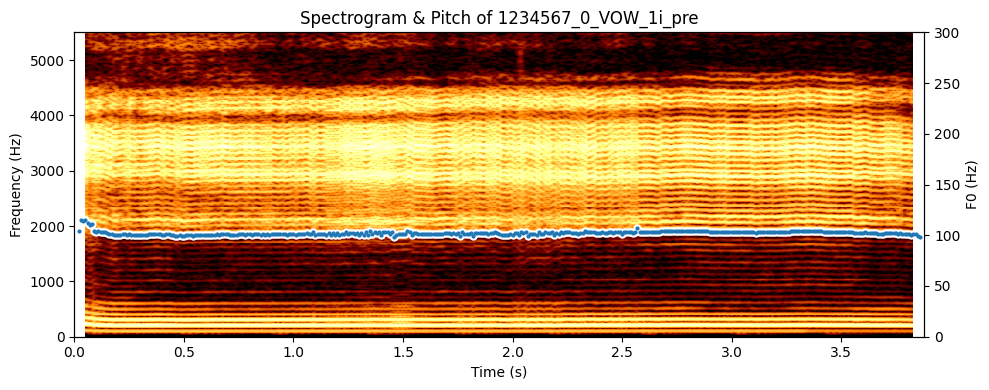

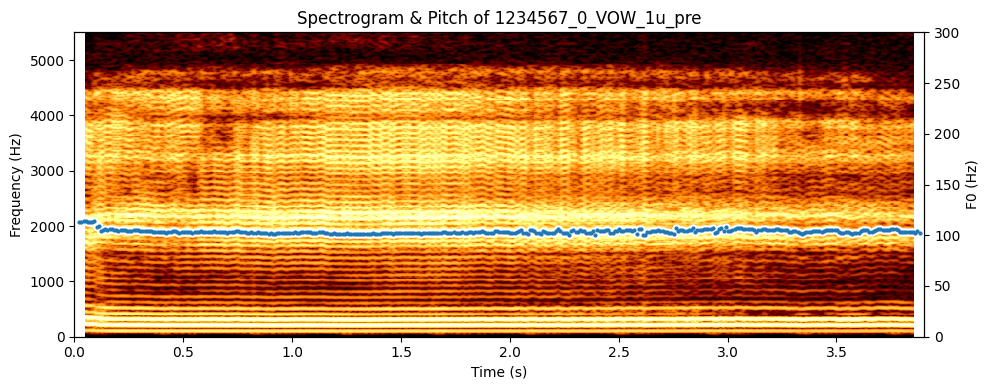

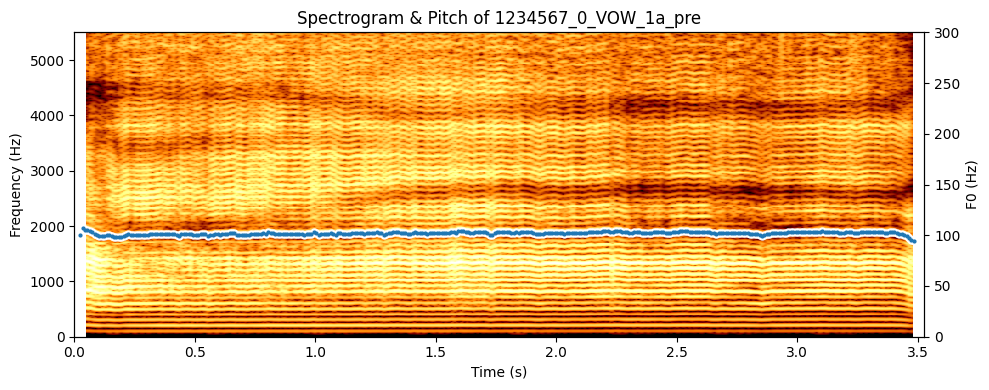

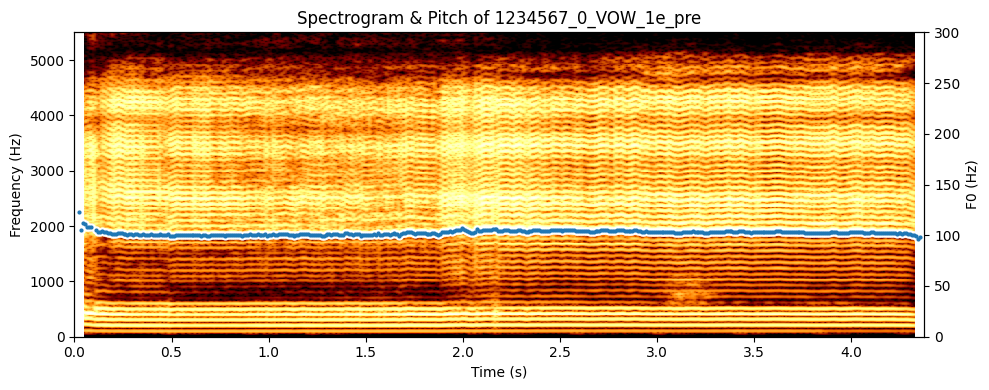

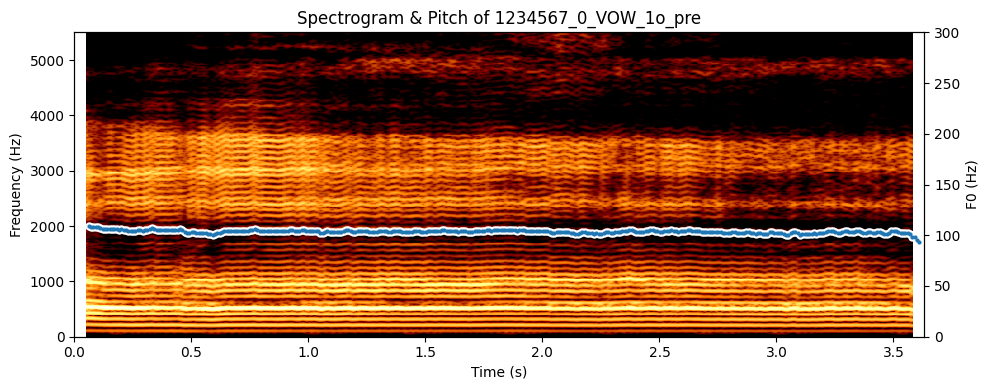

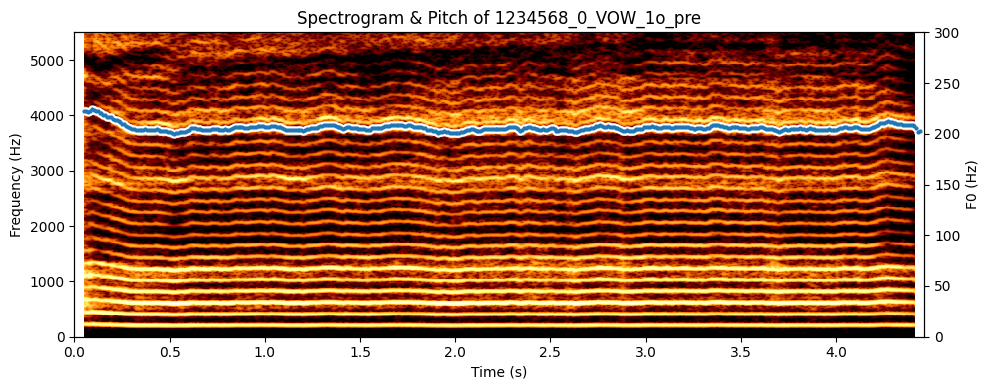

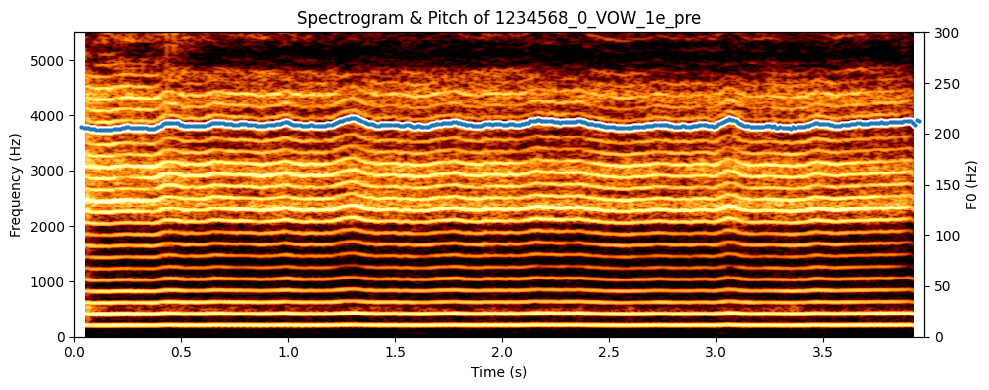

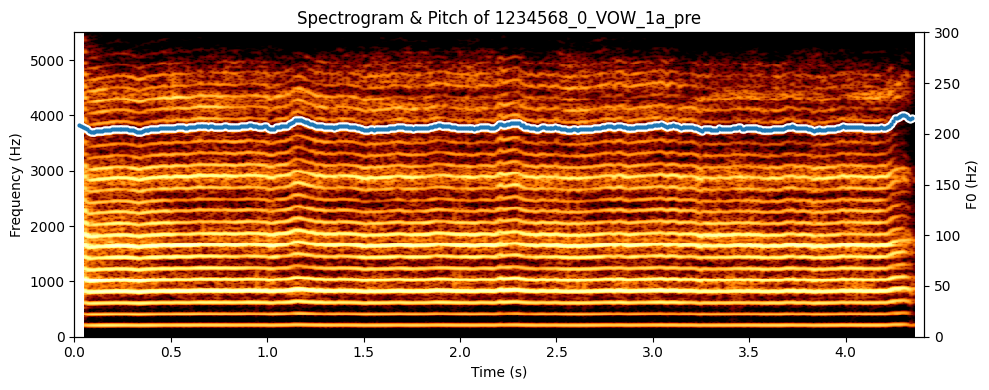

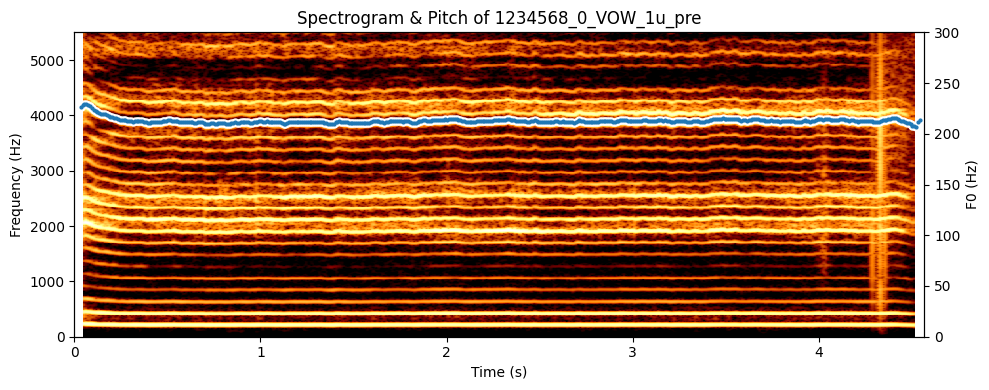

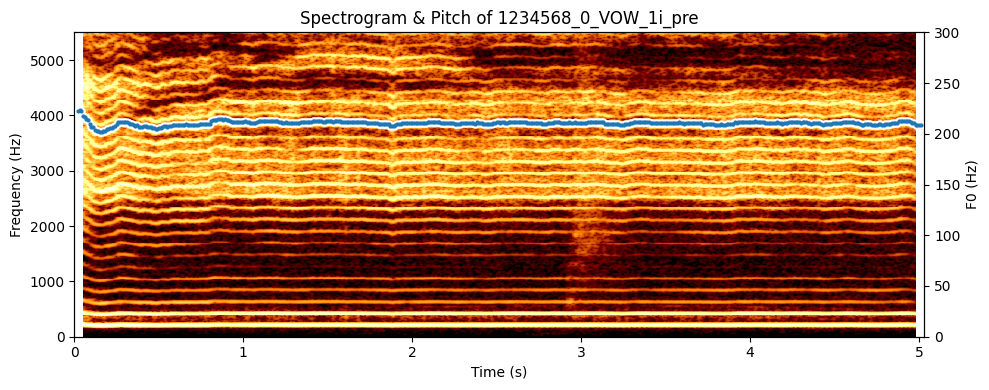

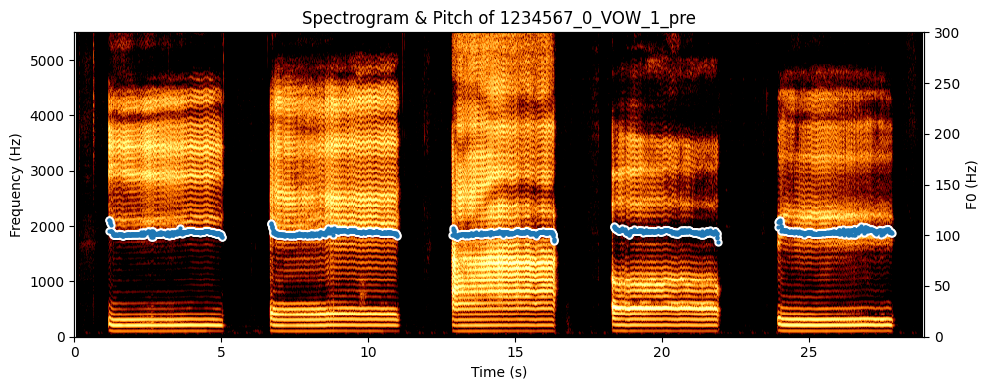

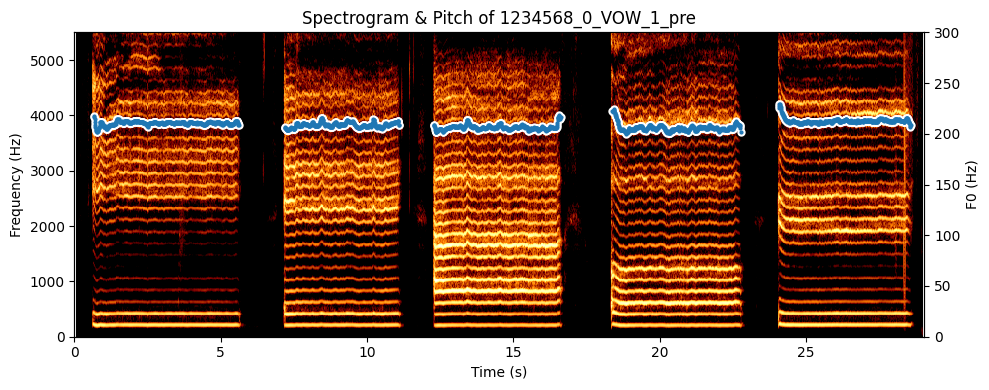

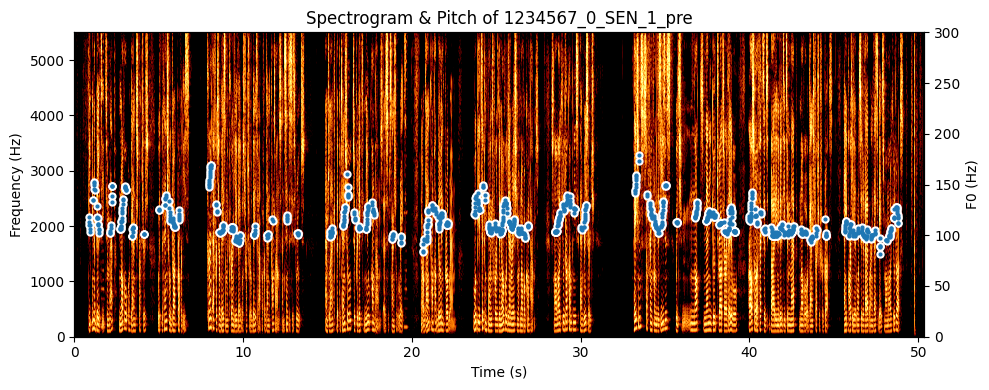

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import parselmouth
from parselmouth.praat import call
from paths import *
from pathlib import Path

def draw_pitch(pitch, y_lim):
    pitch_values = pitch.selected_array['frequency']
    pitch_values[pitch_values==0] = np.nan
    plt.plot(pitch.xs(), pitch_values, 'o', markersize=5, color='w')
    plt.plot(pitch.xs(), pitch_values, 'o', markersize=2)
    plt.ylim(0, y_lim)
    plt.ylabel('F0 (Hz)')
    
def draw_spectrogram(sound, window, max_freq, dynamic_range):
    spectrogram = sound.to_spectrogram(window_length=window, maximum_frequency=max_freq)
    X, Y = spectrogram.x_grid(), spectrogram.y_grid()
    sg_db = 10 * np.log10(spectrogram.values)
    plt.pcolormesh(X, Y, sg_db, vmin=sg_db.max() - dynamic_range, cmap='afmhot')
    plt.ylim([spectrogram.ymin, spectrogram.ymax])
    
def draw_spectrogram_pitch_plot(audio_file, y_lim=300, window=0.05, max_freq=5500, dynamic_range=70):
    sound = parselmouth.Sound(str(audio_file))
    pitch = sound.to_pitch()
    end_time = sound.get_end_time()
    
    plt.figure(figsize=(10, 4))    
    
    spectrogram = draw_spectrogram(sound, window=window, max_freq=max_freq, dynamic_range=dynamic_range)
    
    plt.title(f"Spectrogram & Pitch of {audio_file.stem}")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.twinx()
    draw_pitch(pitch, y_lim)    
    plt.xlim([sound.xmin, sound.xmax])
    plt.tight_layout()
    plt.savefig(f"plots/spec_pitch_{audio_file.stem}")
    plt.show()

include = ['audio_files_'] ## only how the folders start
exclude = ['audio_files_original', 'audio_files_segments_best'] ## these are excluded entirely
base_path = Path.cwd()
audio_dirs = [p for p in base_path.iterdir() if p.is_dir() and any(p.name.startswith(prefix) for prefix in include) and p.name not in exclude]
audio_files = [file for d in audio_dirs for file in d.rglob('*') if file.is_file()]    

for audio_file in audio_files:
    draw_spectrogram_pitch_plot(audio_file)

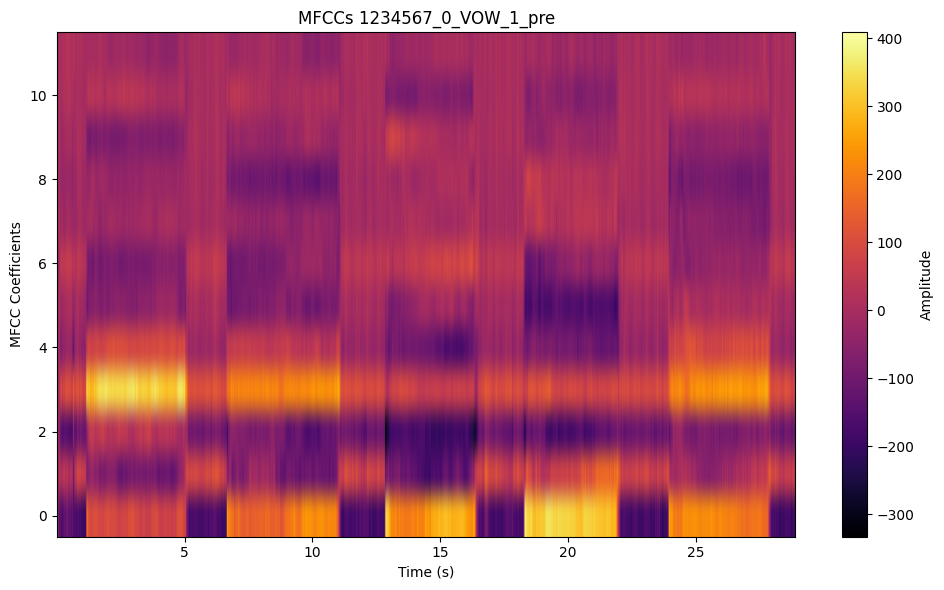

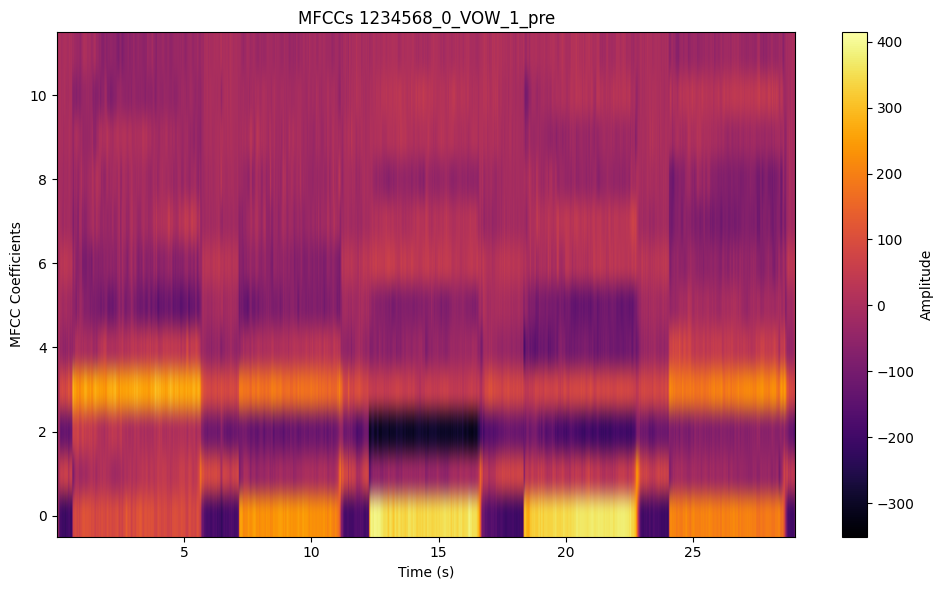

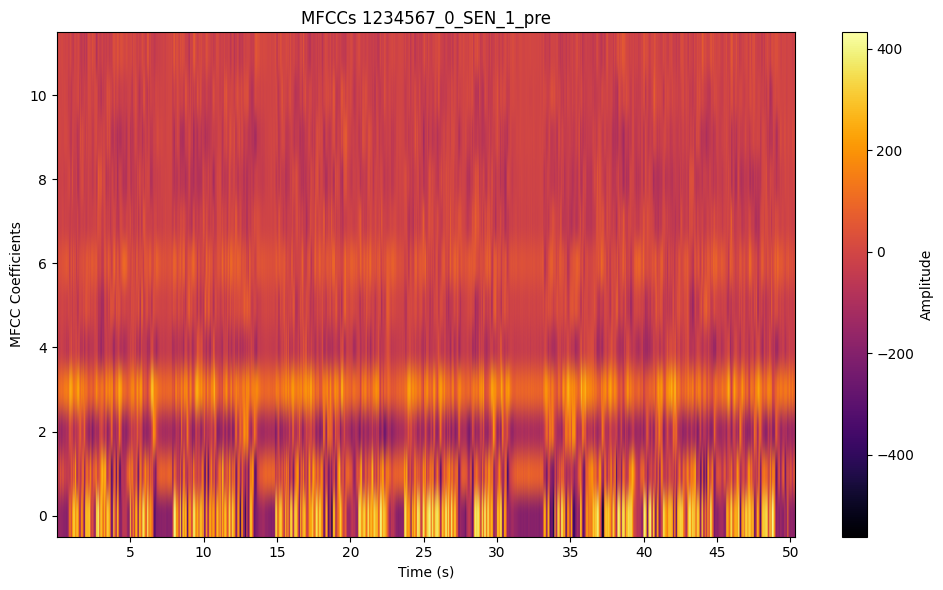

In [42]:
import parselmouth
from parselmouth.praat import call
import matplotlib.pyplot as plt

def draw_mfcc_plot(audio_file):
    time_step = 0.006
    sound = parselmouth.Sound(str(audio_file))
    mfcc_obj = sound.to_mfcc(time_step=time_step)

    mfcc_matrix = mfcc_obj.to_matrix().values
    num_frames = mfcc_matrix.shape[1]
    
    time_labels = [i * time_step for i in range(num_frames)]
    tick_seconds = [5 * i for i in range(1, int(time_labels[-1] // 5) + 1)]
    tick_frames = [int(t / time_step) for t in tick_seconds]

    plt.figure(figsize=(10, 6))
    plt.imshow(mfcc_matrix, aspect='auto', origin='lower', cmap='inferno')
    plt.colorbar(label="Amplitude")
    plt.xlabel("Time (s)")
    plt.ylabel("MFCC Coefficients")
    plt.title(f"MFCCs {audio_file.stem}")
    plt.xticks(ticks=tick_frames, labels=tick_seconds)
    plt.tight_layout()
    plt.savefig(f'plots/mfcc_{audio_file.stem}') 
    plt.show()
    
include = ['audio_files_pre'] ## only how the folders start
exclude = ['audio_files_pre/VOW', 'audio_files_segments_best'] ## these are excluded entirely
base_path = Path.cwd()
audio_dirs = [p for p in base_path.iterdir() if p.is_dir() and any(p.name.startswith(prefix) for prefix in include) and p.name not in exclude]
audio_files = [file for d in audio_dirs for file in d.rglob('*') if file.is_file()]    

for audio_file in audio_files:
    draw_mfcc_plot(audio_file)